In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file = "C://Users//aarif//OneDrive//Desktop//walmart//walmart dataset.xlsx"

In [5]:
!pip install fsspec

   ---------------------------------------- 0.0/177.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/177.6 kB ? eta -:--:--
   -- ------------------------------------- 10.2/177.6 kB ? eta -:--:--
   -------- ------------------------------ 41.0/177.6 kB 653.6 kB/s eta 0:00:01
   ------------------------------------ --- 163.8/177.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 177.6/177.6 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
data = pd.read_excel(file)

In [7]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1


In [11]:
data['Revenue'] = data['Unit price'] * data['Quantity']

In [13]:
sales_revenue_city_branch = data.groupby(['City', 'Branch']).agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

In [14]:
print(sales_revenue_city_branch)

        City Branch  Total_Sales  Total_Revenue
0   Mandalay      A          637       34130.09
1   Mandalay      B          664       37215.93
2   Mandalay      C          519       29794.62
3  Naypyitaw      A          648       35985.64
4  Naypyitaw      B          604       35157.75
5  Naypyitaw      C          579       34160.14
6     Yangon      A          598       33647.27
7     Yangon      B          631       35193.51
8     Yangon      C          630       32302.43


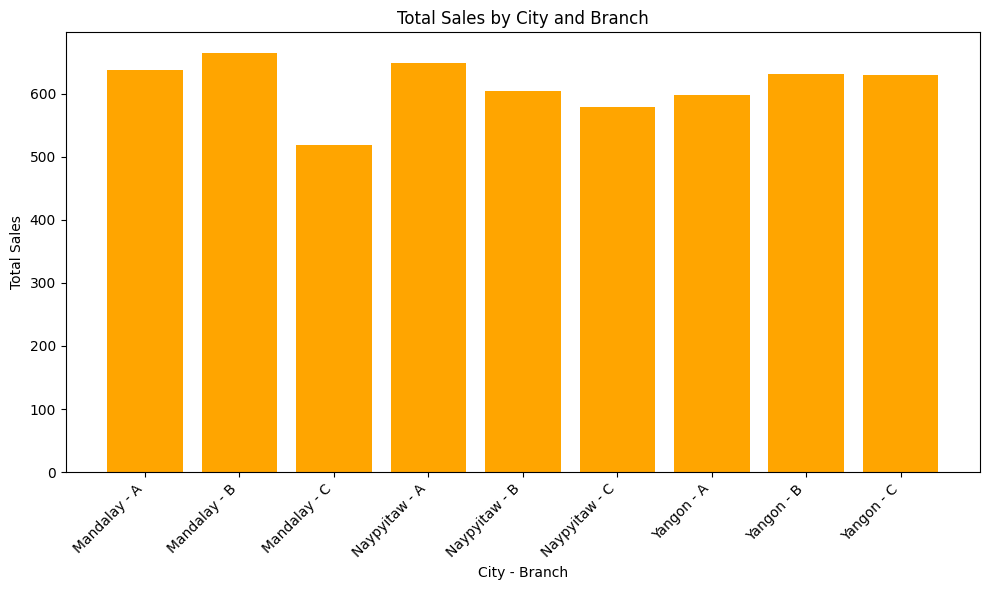

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(sales_revenue_city_branch['City'] + ' - ' + sales_revenue_city_branch['Branch'],
        sales_revenue_city_branch['Total_Sales'], color='orange')
plt.xlabel('City - Branch')
plt.ylabel('Total Sales')
plt.title('Total Sales by City and Branch')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#**The above chart is for total sales by city and Branch**

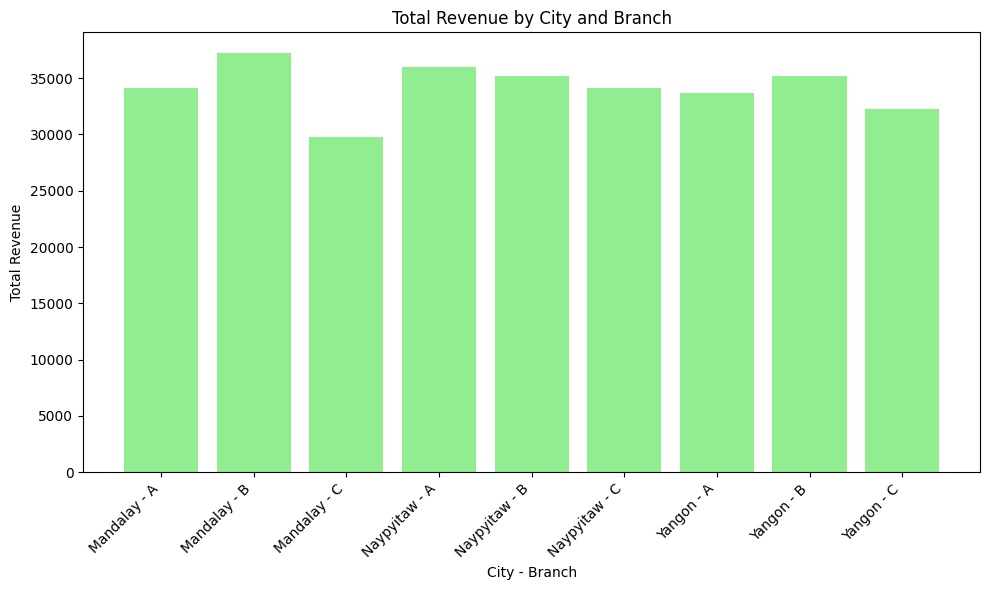

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(sales_revenue_city_branch['City'] + ' - ' + sales_revenue_city_branch['Branch'],
        sales_revenue_city_branch['Total_Revenue'], color='lightgreen')
plt.xlabel('City - Branch')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by City and Branch')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The above chart is for total revenue generated by City and Branch**

**Question B: - What is the average price of an item sold at each branch of the city**

In [29]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2,40.35
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7,31.84
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1,65.82


In [31]:
average_price_branch = data.groupby(['City', 'Branch']).agg(
    Average_Price=('Unit price', 'mean')
).reset_index()

In [32]:
print(average_price_branch)

        City Branch  Average_Price
0   Mandalay      A      53.353866
1   Mandalay      B      56.133305
2   Mandalay      C      57.958316
3  Naypyitaw      A      54.123182
4  Naypyitaw      B      57.785688
5  Naypyitaw      C      57.941009
6     Yangon      A      55.639298
7     Yangon      B      56.011062
8     Yangon      C      52.684602


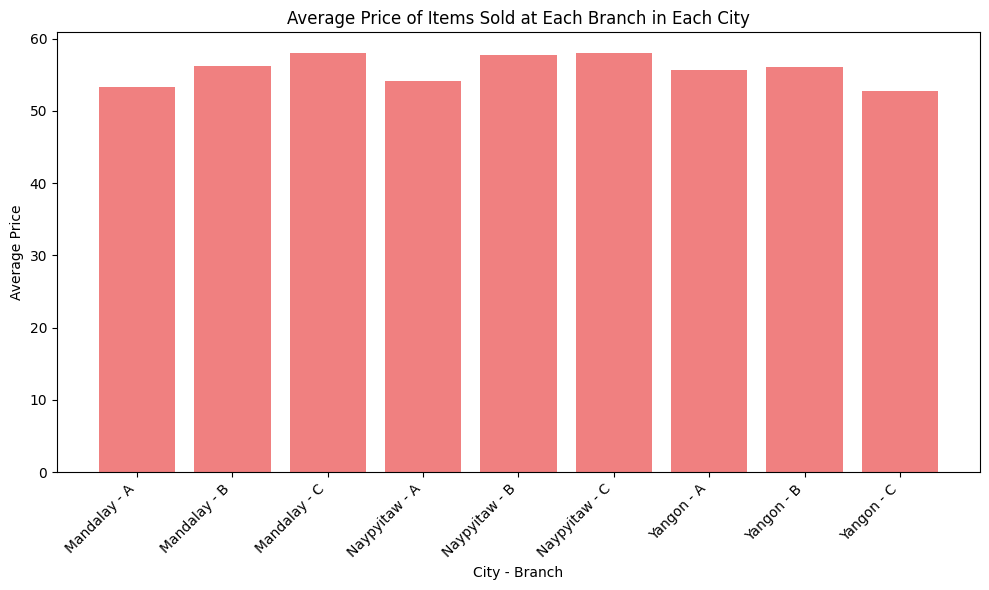

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(average_price_branch['City'] + ' - ' + average_price_branch['Branch'],
        average_price_branch['Average_Price'], color='lightcoral')

plt.xlabel('City - Branch')
plt.ylabel('Average Price')
plt.title('Average Price of Items Sold at Each Branch in Each City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Question C: - Analyze the performance of sales and revenue, Month over Month across the
Product line, Gender, and Payment Method, and identify the focus areas to
get better sales for April 2019.**

In [35]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.to_period('M')
data['Revenue'] = data['Unit price'] * data['Quantity']

monthly_analysis = data.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

april_2019_analysis = monthly_analysis[monthly_analysis['Month'] == '2019-04']
print("April 2019 Analysis:")
print(april_2019_analysis)

march_2019_analysis = monthly_analysis[monthly_analysis['Month'] == '2019-03']
comparison = pd.merge(april_2019_analysis, march_2019_analysis, on=['Product line', 'Gender', 'Payment'], suffixes=('_April', '_March'))

comparison['Sales_Change'] = comparison['Total_Sales_April'] - comparison['Total_Sales_March']
comparison['Revenue_Change'] = comparison['Total_Revenue_April'] - comparison['Total_Revenue_March']

print("\nComparison of April 2019 with March 2019:")
print(comparison)

focus_areas = comparison[(comparison['Sales_Change'] < 0) | (comparison['Revenue_Change'] < 0)]

print("\nFocus Areas for Improvement in April 2019:")
print(focus_areas)

April 2019 Analysis:
Empty DataFrame
Columns: [Month, Product line, Gender, Payment, Total_Sales, Total_Revenue]
Index: []

Comparison of April 2019 with March 2019:
Empty DataFrame
Columns: [Month_April, Product line, Gender, Payment, Total_Sales_April, Total_Revenue_April, Month_March, Total_Sales_March, Total_Revenue_March, Sales_Change, Revenue_Change]
Index: []

Focus Areas for Improvement in April 2019:
Empty DataFrame
Columns: [Month_April, Product line, Gender, Payment, Total_Sales_April, Total_Revenue_April, Month_March, Total_Sales_March, Total_Revenue_March, Sales_Change, Revenue_Change]
Index: []


In [37]:
print(data['Date'].min())
print(data['Date'].max())


2019-01-01 00:00:00
2019-03-30 00:00:00


In [38]:
april_2019_data = data[data['Month'] == '2019-04']
print(april_2019_data)


Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Date, Time, Payment, Rating, Revenue, Month]
Index: []


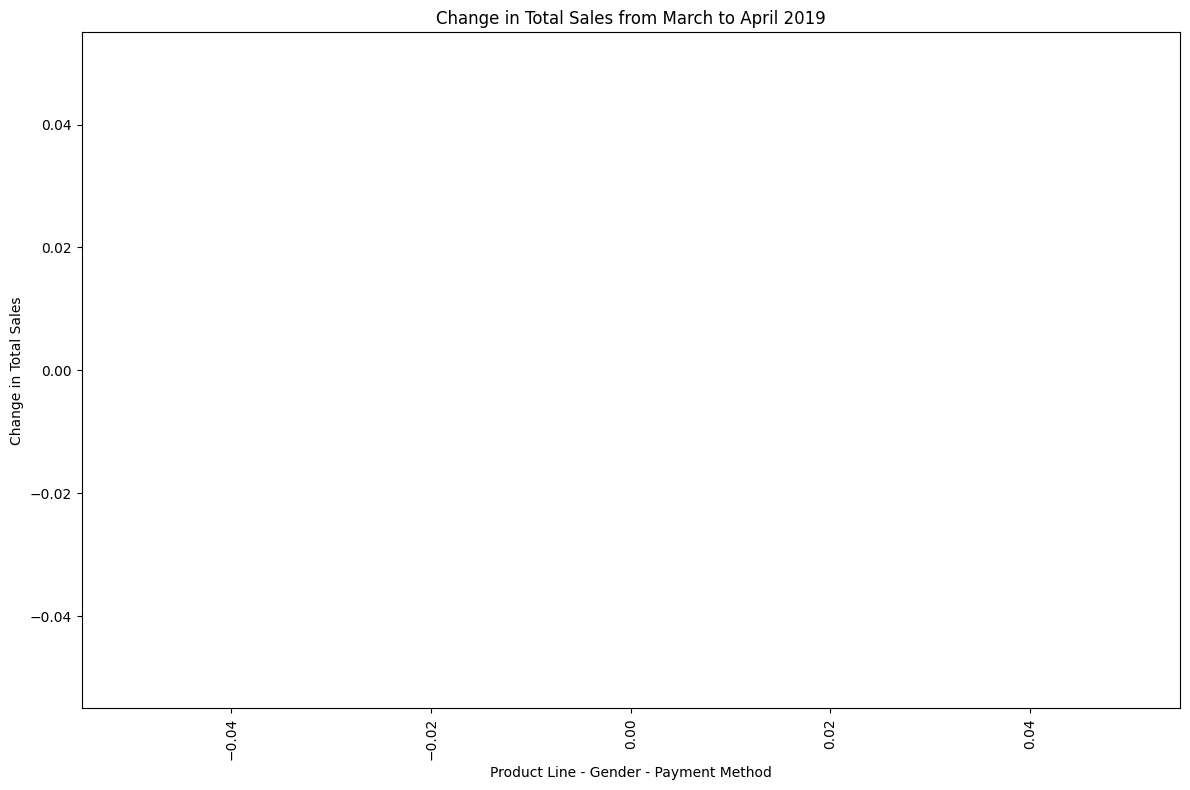

In [39]:
plt.figure(figsize=(12, 8))
plt.bar(comparison['Product line'] + ' - ' + comparison['Gender'] + ' - ' + comparison['Payment'],
        comparison['Sales_Change'], color='skyblue')
plt.xlabel('Product Line - Gender - Payment Method')
plt.ylabel('Change in Total Sales')
plt.title('Change in Total Sales from March to April 2019')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

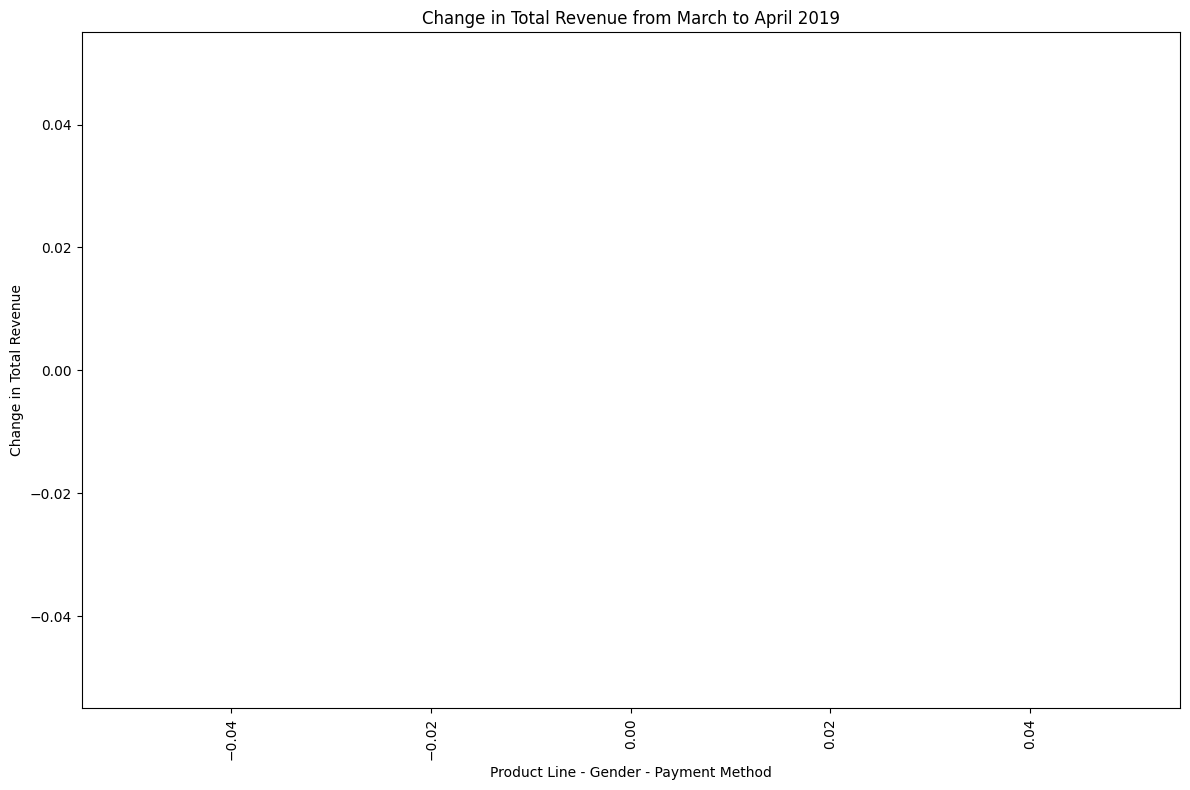

In [40]:
plt.figure(figsize=(12, 8))
plt.bar(comparison['Product line'] + ' - ' + comparison['Gender'] + ' - ' + comparison['Payment'],
        comparison['Revenue_Change'], color='lightgreen')
plt.xlabel('Product Line - Gender - Payment Method')
plt.ylabel('Change in Total Revenue')
plt.title('Change in Total Revenue from March to April 2019')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

**Thats the end of the given question 1**